In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_pepTestCustomers.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


In [3]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D7CEF9608>,
      dtype=object)

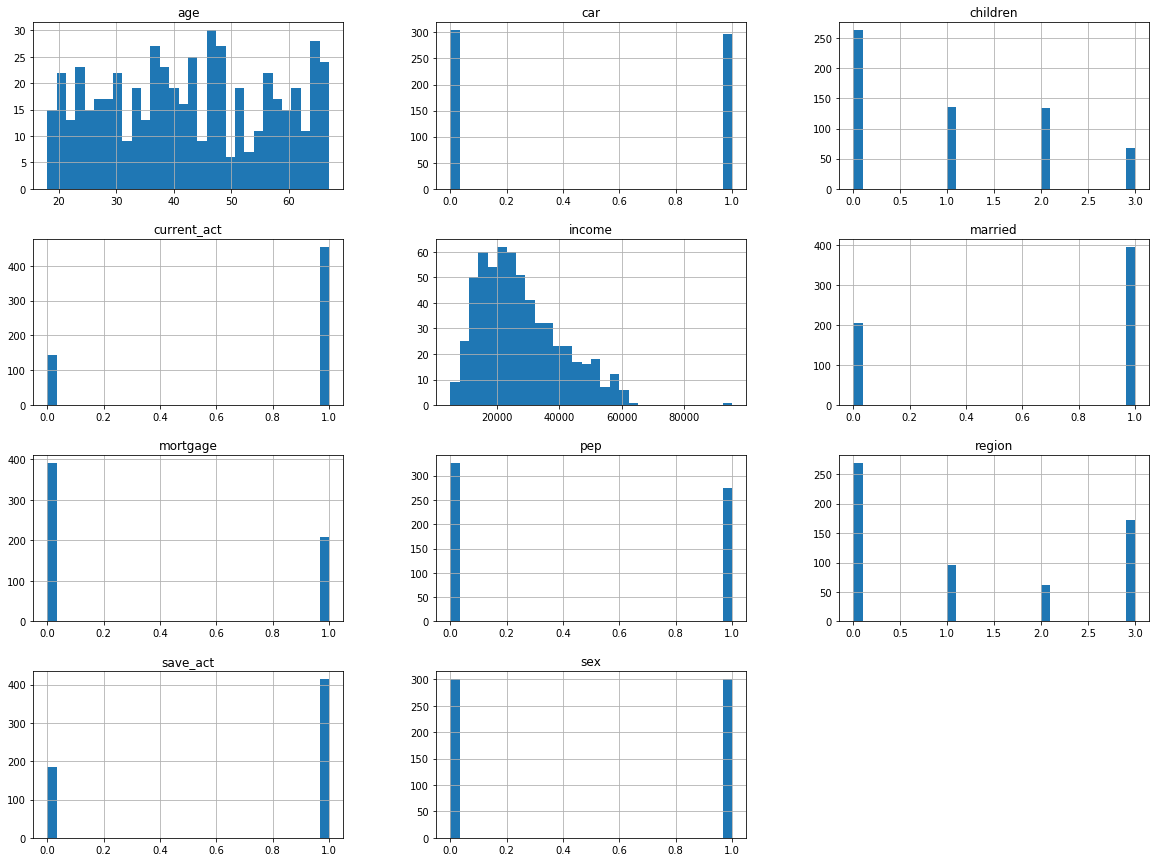

In [4]:
# 모든 수치형 속성에 대한 히스토그램 한꺼번에 그리기
# 숫치형은 age와 income 나머지는 범주형이라 볼 수 있다
# bins = 30 은 x축을 30개로 쪼개라
df.hist(bins=30, figsize=(20,15))

In [5]:
# 속성 간 피어슨 상관계수 출력하기
# 전체 수치형 데이터를 콜러에이션으로 보여 줌
# 상관관계 예측변수를 줄여줌

corr = df.corr()
corr

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


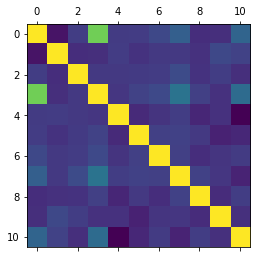

In [6]:
# 속성간 상관계수를 한눈에 파악하기 위해 그림으로 도식하기

plt.matshow(corr)

# 과제 1

In [7]:
# seaborn 모듈을 이용하여 변수명을 함께 표시하는 방법

import seaborn as sns

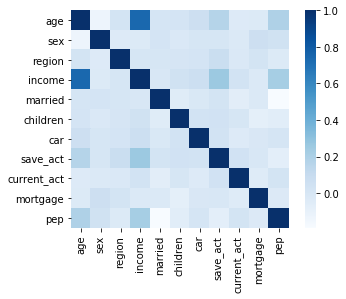

In [8]:
df_mapping = sns.heatmap(corr, cbar = True, 
                         annot = False, annot_kws={'size' : 20}, 
                         fmt = '.2f', square = True, cmap = 'Blues')

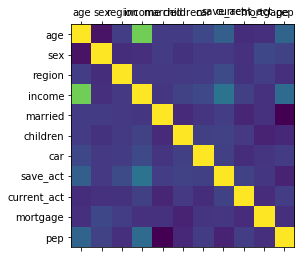

In [9]:
# plo.matshow() 함수 내에서 변수이름을 표시하는 방법

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# 과제 2. 확률을 높여라!

In [10]:
# 복사본 만들기
mdf = df.copy()

In [11]:
# 복사본 확인

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [12]:
# 평균값으로 결측값 대체하기
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [13]:
mdf

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,43.0,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


In [14]:
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], mdf['income']/mdf['children'])
mdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


In [15]:
# drop 없이 돌려보자

In [16]:
from sklearn.model_selection import train_test_split  

In [17]:
dfX = mdf.drop(['id', 'pep'], axis=1)
dfy = mdf['pep']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

In [18]:
display(X_train.shape, X_test.shape)
X_train.head()

(450, 11)

(150, 11)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome
46,50.0,0,0,13283.9,0,1,1,1,1,0,13283.9
263,60.0,0,0,46358.4,1,0,1,1,1,1,46358.4
458,18.0,1,2,13700.2,0,1,0,1,1,0,13700.2
230,59.0,0,0,30189.4,1,0,1,0,1,1,30189.4
107,23.0,1,0,13039.9,1,0,0,0,1,0,13039.9


In [19]:
# 트리 탐색
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
pred_tree = tree.predict(X_test); pred_tree

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [21]:
# 트리 확률
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.94

0.8666666666666667

In [22]:
# SVM 탐색
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
# SVM 확률
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.66

0.6333333333333333

In [24]:
# 신경망 탐색
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
# 신경망 확률
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.5511111111111111

0.52

# 과제 3. 이 외의 예측 알고리즘

In [26]:
# 랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
display(r_forest.score(X_train, y_train))
display(r_forest.score(X_test, y_test))

1.0

0.8733333333333333

In [28]:
# 그라디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier()
g_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
display(g_boost.score(X_train, y_train))
display(g_boost.score(X_test, y_test))

0.9511111111111111

0.9066666666666666

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost2 = GradientBoostingClassifier(learning_rate=0.01)
g_boost2.fit(X_train, y_train)

display(g_boost2.score(X_train, y_train))
display(g_boost2.score(X_test, y_test))

0.8511111111111112

0.8133333333333334